##### Summary
### This notebook creates 5 visualizations:
#### Section 3.1 - A heatmap showing the areas where flats are listed for sale 
#### Section 3.2 - A choropleth map showing the asking price ranges in the different Edinburgh postcode sectors (EHXY Z**) 
#### Section 3.3 - A choropleth map showing the % above or below the asking price paid in the different Edinburgh postcode sectors (EHXY Z**) 
#### Section 4.1 - A violinplot showing the Asking Prices range in which different Estate Agents operate.
#### Section 4.2 - A violinplot showing the % over/under the Asking Price achieved by different Estate Agents.

# 1 - Import libraries

In [16]:
import os
import numpy as np
import pandas as pd
import shapefile as shp
import geopandas
import googlemaps 
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium.plugins import HeatMap 

# 2 - Load information and set up datasets

In [17]:
# SET FILES PATH
os.chdir("/Users/apple/Desktop/Data Science/Properties/")

# CREATE THE BOUNDARIES DATAFRAME USING THE .SHP FILE
df = geopandas.read_file("/Users/apple/Desktop/Data Science/Properties/Distribution/Sectors.shp")
#COPY ONLY THE ONES FROM EDINBURGH (EH)
df = df[df['name'].astype(str).str.startswith('EH')] 

# CONVERT TO A COORDINATES SYSTEM THAT ALLOWS TO ADD BACKGROUND MAPS AND RENAME
df = df.to_crs(epsg=3857) 

df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
df.columns = ['Postcode', 'geometry','coords']

# CREATE THE PROPERTIES DATAFRAME

dfy=pd.read_csv('Edinburgh_Final2.csv')
dfy['Postcode'] = dfy['Postcode'].astype(str).str[:-2]
dfy1=dfy.groupby(['Postcode']).mean()

# MERGE BOTH DATAFRAMES

df1 = df.merge(dfy1, on='Postcode')

# DO SOME CLEANING OF THE ENTRIES
df1 = df1[df1['Asking Price'] > 1]  

In [21]:
dfy1.head()

,Asking Price,LAT,LON,Sold Price
Postcode,,,,
EH1 1,301665.000000,55.949725,-3.188708,200500.000000
EH1 2,238000.000000,55.948109,-3.194756,198000.000000
EH1 3,373500.000000,55.957501,-3.188688,515000.000000
EH10 4,296333.333333,55.934078,-3.209042,362124.166667
EH10 5,346500.000000,55.923489,-3.217634,333010.428571


# 3 - Visualizations
### 3.1 Choropleth map with Asking Price by postcode sector

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A v

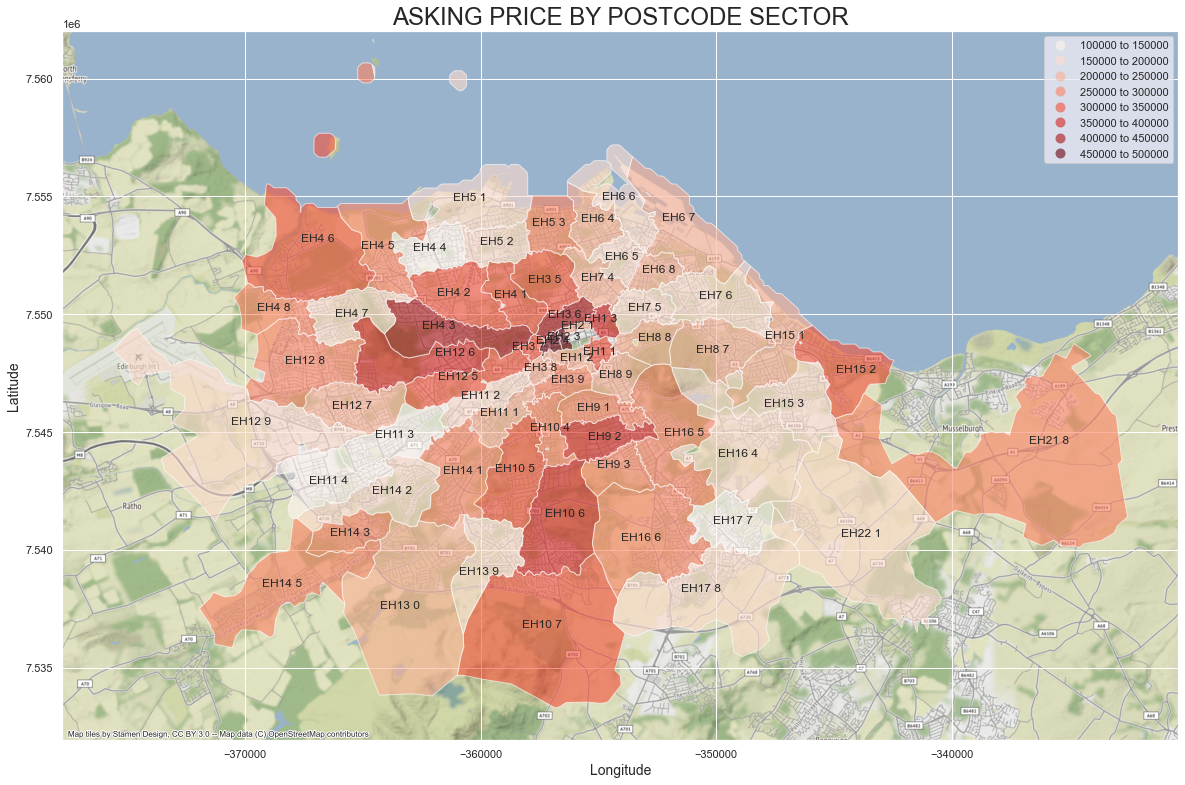

In [37]:
# CREATE COPY OF DATAFRAME
df2=df1

#DEFINE A NEW COLUMN WITH ASKING PRICE RANGES TO DISPLAY ON A CHOROPLETH MAP
df2['Asking Price Range']="" 
for i in df2.index:
    if df2['Asking Price'][i] < 100000:
        df2['Asking Price Range'][i]='Less than 100000'
    elif df2['Asking Price'][i] <149999: 
        df2['Asking Price Range'][i]='100000 to 150000'
    elif df2['Asking Price'][i] <199999:
        df2['Asking Price Range'][i]='150000 to 200000'
    elif df2['Asking Price'][i] <249999:
        df2['Asking Price Range'][i]='200000 to 250000'
    elif df2['Asking Price'][i] <299999:
        df2['Asking Price Range'][i]='250000 to 300000'
    elif df2['Asking Price'][i] <349999:
        df2['Asking Price Range'][i]='300000 to 350000'
    elif df2['Asking Price'][i] <399999:
        df2['Asking Price Range'][i]='350000 to 400000'
    elif df2['Asking Price'][i] <449999:
        df2['Asking Price Range'][i]='400000 to 450000'
    elif df2['Asking Price'][i] <499999:
        df2['Asking Price Range'][i]='450000 to 500000'
    elif df2['Asking Price'][i] <700000:
        df2['Asking Price Range'][i]='Higher than 500000'

# APPLY PLOT LAYOUT
ax=df2.plot(column='Asking Price Range',cmap='Reds',figsize=(20, 20),alpha=0.6, legend=True)

ctx.add_basemap(ax)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('ASKING PRICE BY POSTCODE SECTOR', fontsize=24)


# ADD ANNOTATIONS OF POSTOCDE NAMES TO THE MAP
for idx, row in df2.iterrows():
    ay=plt.annotate(s=row['Postcode'], xy=row['coords'],horizontalalignment='center')
    ay.set_fontsize(12)

#plt.savefig('Asking Prices.png')

### 3.2 Choropleth map with % paid Over/Under Asking Price by postcode sector

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A valu

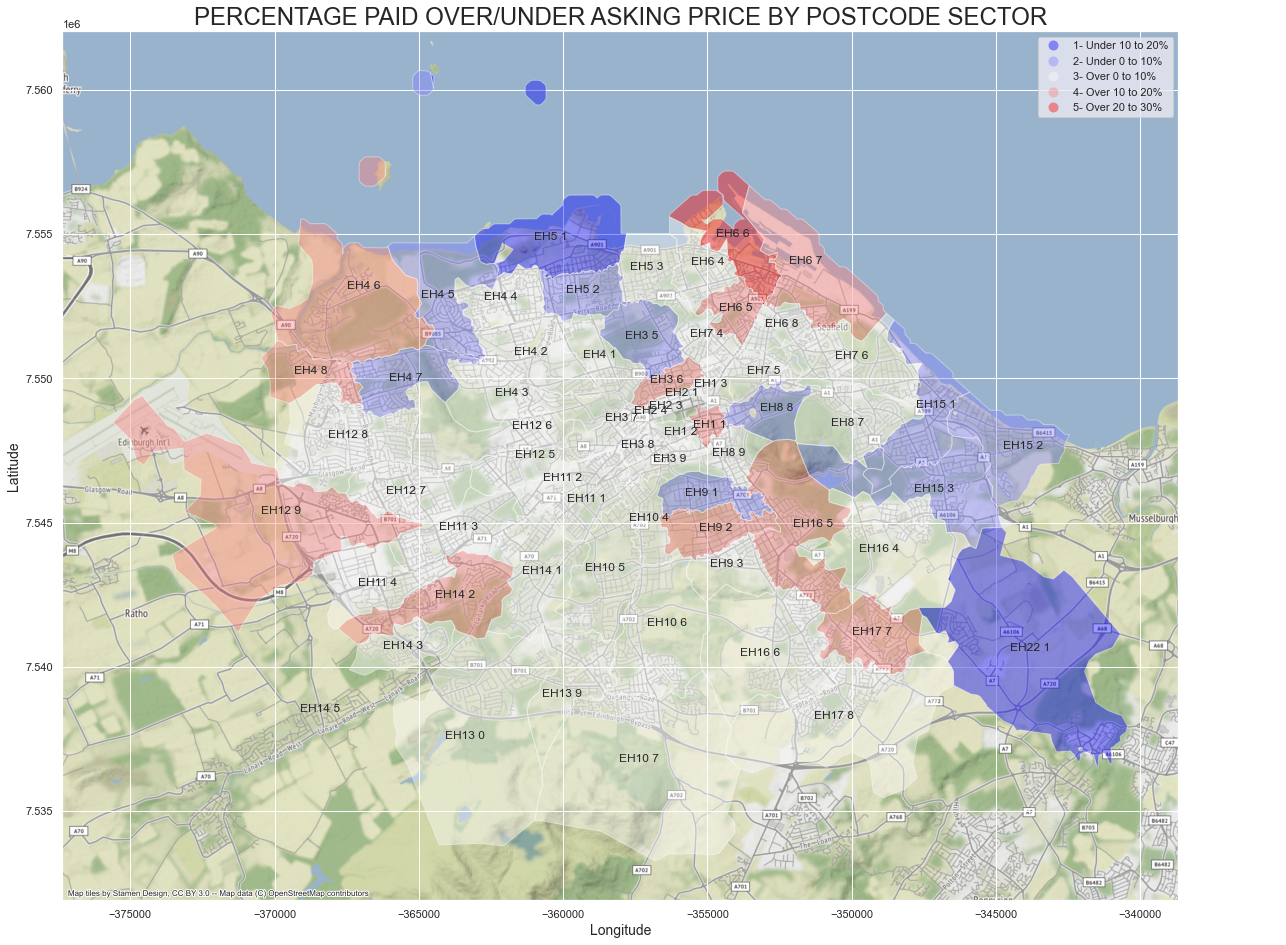

In [12]:
# MODIFY THE PROPERTIES DATAFRAME

dfx=pd.read_csv('Edinburgh_Final2.csv')

# DROP ENTRIES WITHOUT SOLD PRICES
dfx.dropna(subset=['Sold Price'], inplace=True)

# GROUPBY POSTCODE SECTOR
dfx['Postcode'] = dfx['Postcode'].astype(str).str[:-2]
dfx1=dfx.groupby(['Postcode']).mean()

# MERGE BOTH DATAFRAMES
df3 = df.merge(dfx1, on='Postcode')

# CONVERT TO COORDINATES SYSTEM AND DO SOME CLEANING OF THE ENTRIES
df3 = df3.to_crs(epsg=3857)
df3 = df3[df3['Asking Price'] > 1]  

# CREATE NEW COLUMN WITH RANGES OF % PAID OVER/UNDER ASKING PRICE
df3['Percent']=(df3['Sold Price']-df3['Asking Price'])/df3['Asking Price']
df3['Percent Range']=""
for i in df3.index:   
    #if df3['Percent'][i] < -0.4:
        #df3['Percent Range'][i]='1- Under 40 to 50%'
    #elif df3['Percent'][i] < -0.3: 
        #df3['Percent Range'][i]='2- Under 30 to 40%'
    #elif df3['Percent'][i] <-0.2:
        #df2['Percent Range'][i]='3- Under 20 to 30%'
    if df3['Percent'][i] <-0.1:
        df3['Percent Range'][i]='1- Under 10 to 20%'
    elif df3['Percent'][i] <0:
        df3['Percent Range'][i]='2- Under 0 to 10%'
    elif df3['Percent'][i] <0.1:
        df3['Percent Range'][i]='3- Over 0 to 10%'
    elif df3['Percent'][i] <0.2:
        df3['Percent Range'][i]='4- Over 10 to 20%'
    elif df3['Percent'][i] <0.3:
        df3['Percent Range'][i]='5- Over 20 to 30%'
    #elif df3['Percent'][i] <0.4:
        #df3['Percent Range'][i]='9- Over 30 to 40%'

# APPLY PLOT LAYOUT
sns.set(font_scale=1)
ax=df3.plot(column='Percent Range',cmap='bwr',figsize=(20, 20),alpha=0.4, legend=True)
ctx.add_basemap(ax)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('PERCENTAGE PAID OVER/UNDER ASKING PRICE BY POSTCODE SECTOR', fontsize=24)

# ADD ANNOTATIONS OF POSTOCDE NAMES TO THE MAP
for idx, row in df2.iterrows():
    ay = plt.annotate(s=row['Postcode'], xy=row['coords'],horizontalalignment='center')
    ay.set_fontsize(12)

### 3.3 Heatmap of properties for sale in Edinburgh

In [6]:
# CREATE DF COPY AND SORT BY DATE POSTED
dfheat=df1
dfheat.sort_values('Date Posted', ascending=False).head() # Sorting Dataframe values by Date Posted.

# REMOVE ENTRIES NOT SHOWING LAT/LON
dfheat.dropna(subset=['LAT'], inplace=True) 

'''
Index(['Address', 'Asking Price', 'Date Posted', 'Number of beds', 'LAT',
       'LON', 'Sold Price', 'Address_input'],
      dtype='object')
      '''

dfheat['Asking Price'] = dfheat['Asking Price'].astype(float) # Convert Asking Price into Float.
#dfheat.info()

# OBTAIN MAX AMOUNT PAID TO ESTABLISH RANGE FOR HEATMP COLOURING
max_amount = float(dfheat['Asking Price'].max()) 

# CREATE GEOGRAPHICAL HEATMAP CENTERED IN EDINBURGH CITY CENTRE.
heat_map = folium.Map(location=[55.9577966,-3.2112118], zoom_start=12, ) 

# PLOT VALUES IN GRAPH BASED ON 'ASKING PRICE' - THIS WILL DISPLAY THE FREQUENCY, WITH WARMER COLOURS IN AREAS OF HIGHER CONCENTRATION
heat_map_wide = HeatMap( list(zip(dfheat.LAT.values, dfheat.LON.values, dfheat['Asking Price'].values)),
                   min_opacity=0.4,
                   popup=list(dfheat['Asking Price'].values),
                   tooltip =list(dfheat['Asking Price'].values),
                   max_val=max_amount,
                   radius=10, blur=8,
                   max_zoom=1,
                 ).add_to(heat_map)

# DISPLAY HEATMAP
heat_map 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 856
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         821 non-null    object 
 1   Asking Price    821 non-null    float64
 2   Date Posted     821 non-null    object 
 3   Number of beds  821 non-null    object 
 4   LAT             821 non-null    float64
 5   LON             821 non-null    float64
 6   Sold Price      528 non-null    float64
 7   Address_input   814 non-null    object 
 8   Estate Agent    310 non-null    object 
 9   Postcode        820 non-null    object 
dtypes: float64(4), object(6)
memory usage: 70.6+ KB


### 4.1 Asking price by Estate Agent
#### Only top agents with >10 properties considered

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'DJ Alexander\xa0'),
  Text(1, 0, 'Neilsons Solicitors'),
  Text(2, 0, 'Warners'),
  Text(3, 0, 'VMH Solicitors'),
  Text(4, 0, 'Deans Properties'),
  Text(5, 0, 'Balfour+Manson'),
  Text(6, 0, 'Coulters\xa0')])

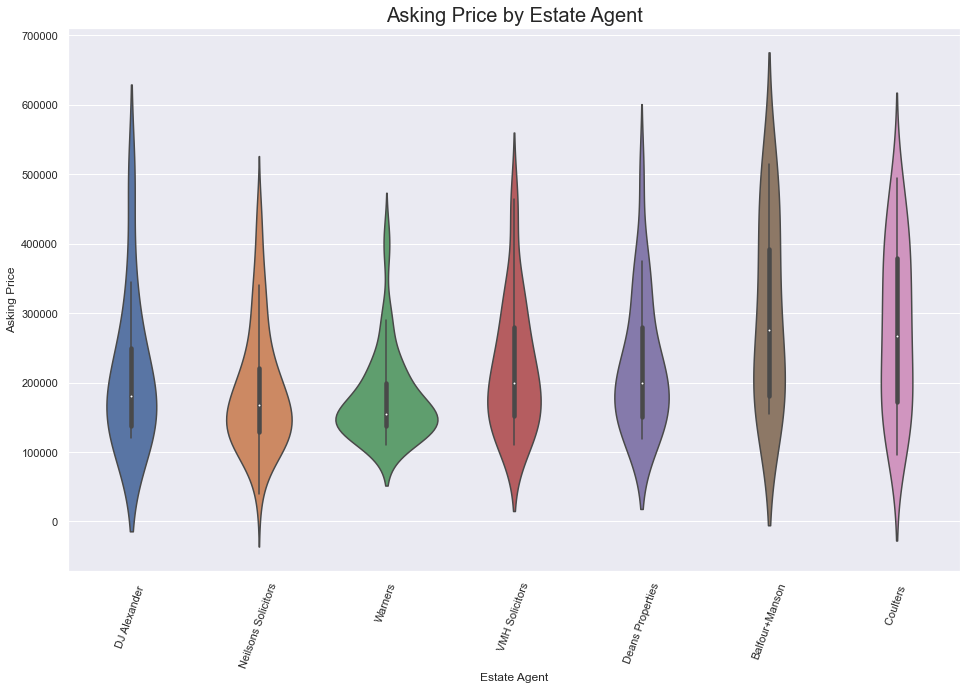

In [39]:
# CREATE COPY OF DATAFRAME
dfes_ag=pd.read_csv('Edinburgh_Final2.csv')

# DEFINE TOP AGENTS (THOSE WITH MORE THAN 10 PROPERTIES SOLD) AND REMOVE THE REST FROM THE STUDY
top_agents = dfes_ag['Estate Agent'].value_counts().loc[lambda x : x>10].index.tolist()
dfes_ag_10 = dfes_ag[dfes_ag['Estate Agent'].isin(top_agents)]

# CREATE A VIOLINPLOT TO SHOW THE DISTRIBUTION OF THE ASKING PRICES THAT EACH AGENT OPERATES IN
sns.set(font_scale=1)
g=sns.violinplot(x="Estate Agent", y="Asking Price",data=dfes_ag_10).set_title('Asking Price by Estate Agent',fontsize=20)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.xticks(rotation=70)

In [19]:
dfes_ag.head()

,Postcode,geometry,coords,Asking Price,LAT,LON,Sold Price
0,EH1 1,"POLYGON ((-355582.432 7548052.134, -355575.562...","(-354935.78047571366, 7548293.34668379)",301665.000000,55.949725,-3.188708,200500.000000
1,EH1 2,"POLYGON ((-356310.868 7547712.006, -356309.580...","(-355940.13930989266, 7548052.937175738)",238000.000000,55.948109,-3.194756,198000.000000
2,EH1 3,"POLYGON ((-354526.134 7550165.678, -354504.423...","(-354902.03396916244, 7549709.735036546)",373500.000000,55.957501,-3.188688,515000.000000
3,EH10 4,"POLYGON ((-357370.013 7544033.270, -357381.164...","(-357041.5411607288, 7545065.959642233)",296333.333333,55.934078,-3.209042,362124.166667
4,EH10 5,"POLYGON ((-357370.013 7544033.270, -357340.634...","(-358541.613523309, 7543334.340087218)",346500.000000,55.923489,-3.217634,333010.428571


### 4.2 Percentage over/under Asking Price achieved by Estate Agent
#### Only top agents with >10 properties considered

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'DJ Alexander\xa0'),
  Text(1, 0, 'Neilsons Solicitors'),
  Text(2, 0, 'Warners'),
  Text(3, 0, 'VMH Solicitors'),
  Text(4, 0, 'Deans Properties'),
  Text(5, 0, 'Balfour+Manson'),
  Text(6, 0, 'Coulters\xa0')])

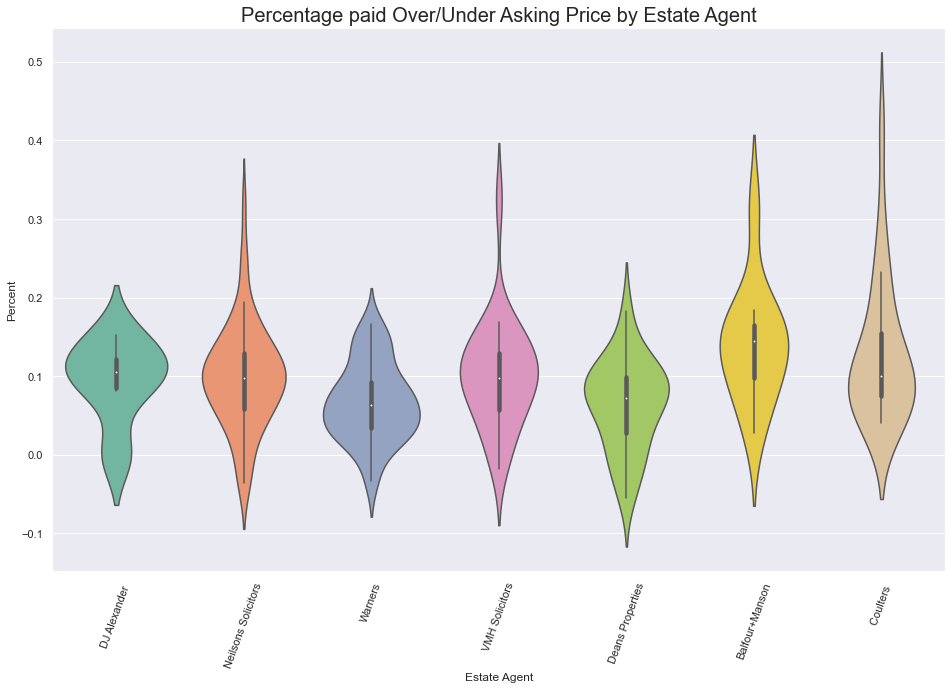

In [38]:
# CREATE NEW COLUMN 'PERCENT' WITH % ACHIEVED ABOVE OR BELOW THE ASKING PRICE
dfes_ag_10['Percent']=(dfes_ag_10['Sold Price']-dfes_ag_10['Asking Price'])/dfes_ag_10['Asking Price']

# CREATE A VIOLINPLOT TO SHOW THE % OVER OR UNDER ASKING PR EACH AGENT
sns.set(font_scale=1)
g=sns.violinplot(x="Estate Agent", y="Percent",data=dfes_ag_10,palette="Set2").set_title('Percentage paid Over/Under Asking Price by Estate Agent',fontsize=20)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.xticks(rotation=70)

In [180]:
top_agents

['Neilsons Solicitors',
 'Warners',
 'VMH Solicitors',
 'Coulters',
 'Deans Properties',
 'Balfour+Manson',
 'DJ Alexander']